# **Tutorial**: Using the simulator `lt.Deterministic`

[<<< Back to the simulator index](https://github.com/juangamella/causal-chamber-package/tree/main/causalchamber/simulators)

Other links:
- [Derivation of the simulators](TODO) -> TODO
- [Simulators source code](https://github.com/juangamella/causal-chamber-package/blob/main/causalchamber/simulators/lt/sensors/main.py)

If you use the simulator in your work, please consider citing:

```
TODO
```

In [1]:
import sys
sys.path = ['../../..'] + sys.path

# %load_ext autoreload
# %autoreload 2

## Dependencies

Besides the `causalchamber` package, the notebook also uses `matplotlib`, `numpy` and `pandas` (specified in `tutorials/requirements.txt`).

In [2]:
import causalchamber
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib import gridspec


Fetching list of available datasets from https://causalchamber.s3.eu-central-1.amazonaws.com/downloadables/directory.yaml ... done.
If you use our datasets or simulators for your work please consider citing:

﻿@article{gamella2025chamber,
  author={Gamella, Juan L. and Peters, Jonas and B{"u}hlmann, Peter},
  title={Causal chambers as a real-world physical testbed for {AI} methodology},
  journal={Nature Machine Intelligence},
  doi={10.1038/s42256-024-00964-x},
  year={2025},
}



## Initializing the simulator

First, import and initialize the simulator with its parameters.

In [3]:
import causalchamber.simulators.lt as lt

In [4]:
# Parameters derived from the technical specifications or fit to data on a separate calibration dataset
parameters = {
    "S": np.array(
        [[4.34165202, 2.8594438, 1.91565691], [0.89410569, 1.58679242, 2.68477163]]
    ),
    "d1": np.array(0.1),
    "d2": np.array(0.17),
    "d3": np.array(0.25),
    "Ts": np.array([0.42685688, 0.41231782, 0.46652526]),
    "Tp": np.array([0.2909342, 0.29624314, 0.30526271]),
    "Tc": np.array([0.00431032, 0.01447611, 0.02041075]),
    "Q": np.array([0.12834946, 0.12870338, 0.13078523]),
    "C0": np.array(58.13307318503893),
    "A": np.array(1.42261211),
    "a1": np.array(506.8049747171294),
    "a2": np.array(510.98343062774353),
}

# Initialize simulator
simulator = lt.Deterministic(**parameters) # store pre-trained model in the current directory

## Running the simulator

To simulate, call the function `.simulate_from_inputs` with a dataframe containing the simulator inputs as columns. There can be additional columns, which the simulator will ignore.

The names of the necessary columns can be obtained as:

In [5]:
simulator.inputs_names

['red',
 'green',
 'blue',
 'pol_1',
 'pol_2',
 'diode_ir_1',
 'diode_ir_2',
 'diode_ir_3',
 'diode_vis_1',
 'diode_vis_2',
 'diode_vis_3',
 't_ir_1',
 't_ir_2',
 't_ir_3',
 't_vis_1',
 't_vis_2',
 't_vis_3',
 'v_c',
 'v_angle_1',
 'v_angle_2']

### Example 1: Random inputs

Let's simulate the sensor outputs for random values of the light-source color (`red, green, blue`) while keeping the other inputs (i.e., the sensor parameters `diode_*, t_*, v_*`) constant.

In [6]:
rng = np.random.default_rng(7); N = 100

inputs = pd.DataFrame(
    {
        "red": rng.uniform(0, 255, size=N),
        "green": rng.uniform(0, 255, size=N),
        "blue": rng.uniform(0, 255, size=N),
        "pol_1": rng.uniform(-180, 180, size=N),
        "pol_2": rng.uniform(-180, 180, size=N),
        "diode_ir_1": 2,
        "diode_ir_2": 2,
        "diode_ir_3": 2,
        "diode_vis_1": 1,
        "diode_vis_2": 1,
        "diode_vis_3": 1,
        "t_ir_1": 3,
        "t_ir_2": 3,
        "t_ir_3": 3,
        "t_vis_1": 3,
        "t_vis_2": 3,
        "t_vis_3": 3,
        "v_c": 5,
        "v_angle_1": 5,
        "v_angle_2": 5,
    }
)
outputs = simulator.simulate_from_inputs(inputs)

You can transform the outputs into a dataframe like this:

In [7]:
outputs = pd.DataFrame(dict(list(zip(simulator.outputs_names, outputs))))
outputs.iloc[1:5]

,ir_1,vis_1,ir_2,vis_2,ir_3,vis_3,current,angle_1,angle_2
1,57420.060850,14739.340520,8544.997205,2254.533726,91.559917,35.787394,131.030695,345.196853,734.606014
2,47019.699168,12292.093491,7025.650761,1893.440189,1421.314167,381.806197,117.943174,639.702563,334.361724
3,23188.689579,6307.254182,3404.557408,943.287205,45.477970,15.779790,89.071042,638.778764,518.392226
4,39978.367199,13037.501868,5925.648134,1983.591446,937.303783,312.635140,115.758490,620.139185,301.801787


Plot the results, e.g., response of the light sensors as a function of the inputs `red, green, blue, pol_1`and `pol_2`.

Text(0.5, 0, '(red + green + blue) / 3')

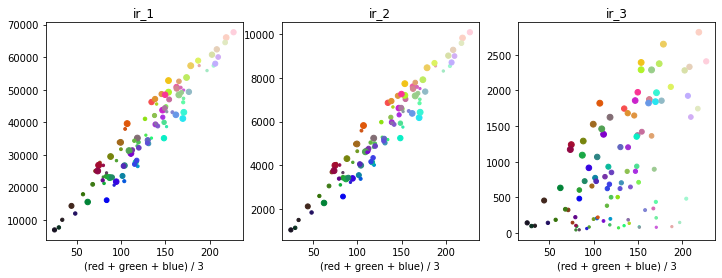

In [8]:
# Color represents the light-source color
color = inputs[['red', 'green', 'blue']].values / 255
# Size represents the scaling effect of the polarizers (Malus' law)
size = 5 + 30 * np.cos(np.deg2rad(inputs.pol_1 - inputs.pol_2))**2
# x-axis is the average of the light-source setting
x = inputs[['red', 'green', 'blue']].values.mean(axis=1)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(x, outputs.ir_1, c=color, s=size)
plt.title("ir_1")
plt.xlabel("(red + green + blue) / 3")
plt.subplot(132)
plt.scatter(x, outputs.ir_2, c=color, s=size)
plt.title("ir_2")
plt.xlabel("(red + green + blue) / 3")
plt.subplot(133)
plt.scatter(x, outputs.ir_3, c=color, s=size)
plt.title("ir_3")
plt.xlabel("(red + green + blue) / 3")

In the plot, the color of each point represents the light-source color (red, green, blue) and the size is given by $\cos^2(\theta_1-\theta_2)$, i.e., the dimming effect of the given by Malus' law.

Only the third sensor, which is placed behind both polarizers, is affected by their relative positions.

### Example 2: Compare to real measurements

We download a dataset of real measurements using the functionality provided in the `causalchamber` package. The downloaded dataset is stored in the path given by `root=` below.

For our experiment we will use the `lt_crl_benchmark_v1` dataset, which is described [here](TODO).

In [9]:
# Download the dataset
dataset = causalchamber.datasets.Dataset('lt_crl_benchmark_v1', root='./', download=True)

# Load the data (inputs, measurements and images) from one of the experiments
experiment = dataset.get_experiment(name='uniform')
observations = experiment.as_pandas_dataframe()

Dataset lt_crl_benchmark_v1 found in "lt_crl_benchmark_v1".


We can directly use the `observations` dataframe as input to the simulator, since it contains the necessary columns. The additional columns are ignored by the simulator.

In [10]:
inputs = observations
outputs = simulator.simulate_from_inputs(inputs)

# transform into a dataframe
outputs = pd.DataFrame(dict(list(zip(simulator.outputs_names, outputs))))

**Plot the results**: real vs. simulated measurements for each sensor

To show the latex symbol for each sensor, we can use the function `causalchamber.ground_truth.latex_name`.

In [11]:
from causalchamber.ground_truth import latex_name

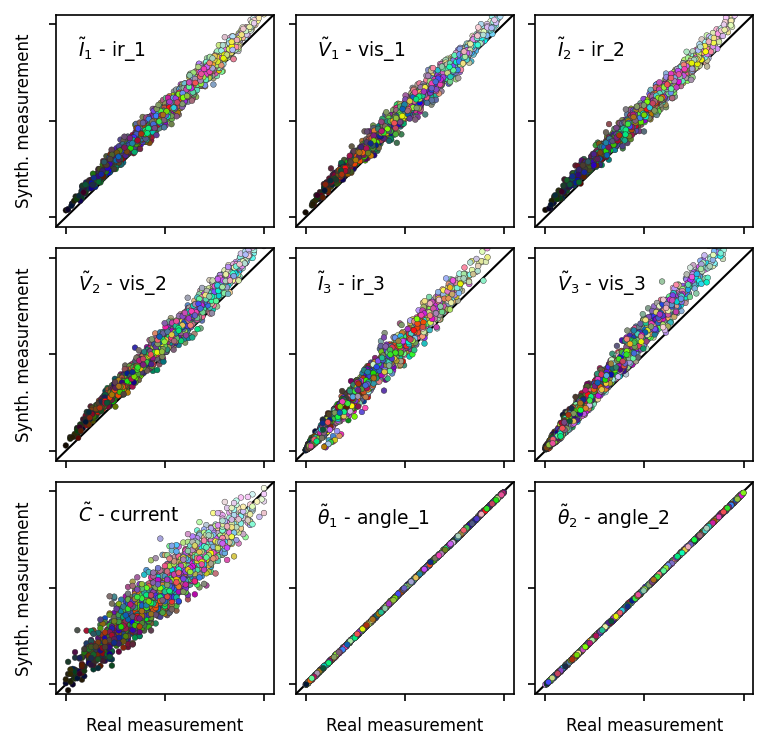

In [12]:
plt.figure(figsize=(6,6), dpi=150)
gs = gridspec.GridSpec(3, 3, wspace=0.1, hspace=0.1)

# real data
real_df = observations

# synthetic data
synth_df = outputs

# Compare observations    
for i,var in enumerate(simulator.outputs_names):
    plt.subplot(gs[i])
    ax = plt.gca()
    truth = real_df[var]
    
    # Again, color for each plotted point is given by the corresponding light-source color
    c = real_df[['red', 'green', 'blue']].values / 256
    
    # Normalize real and synthetic data for easier plotting
    mmin = truth.min()
    mmax = truth.max()
    truth = (truth - mmin) / (mmax - mmin)
    pred = (synth_df[var] - mmin) / (mmax - mmin)
    
    # Plot
    ax.scatter(truth, pred, marker='.', s=30, c=c, edgecolor='#2a2a2a', linewidth=0.2)        

    # Add sensor name
    ax.text(0.1, 0.9, latex_name(var, enclose=True) + " - " + str(var), ha="left", va="top", rotation=0, size=9, transform=ax.transAxes)    

    # Set axes limits
    lim = [-0.05,1.05]
    ax.plot(lim, lim, color='black', zorder=-10, linewidth=1, linestyle="-")#(0, (2, 1)))
    plt.ylim(lim)
    plt.xlim(lim)

    # Add ticks and axis labels
    plt.xticks([0,0.5,1], [])
    plt.yticks([0,0.5,1], [])
    if i >= 6:
        plt.xlabel("Real measurement", size=8)
    if i in [0,3,6]:
        plt.ylabel("Synth. measurement", size=8)
